In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from datetime import datetime, date
import urllib
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
sch_flight = pd.read_csv('Flight_Schedule.csv')
ops_flight = pd.read_csv('Aerobahn_with_Schedule.csv')

In [3]:
print('Scheduled flight count:',sch_flight.shape , '& Operating Flight count:',ops_flight.shape)

Scheduled flight count: (54866, 20) & Operating Flight count: (53486, 23)


In [4]:
sch_flight= sch_flight.dropna()
ops_flight = ops_flight.dropna()

In [5]:
sch_flight.shape,ops_flight.shape

((54866, 20), (53193, 23))

In [6]:
ops_flight.columns

Index(['Date', 'Military Hour', 'Minutes', 'Military Time', 'Block Schedule',
       'Flight Direction', 'PA Airport Code', 'Terminal Desc',
       'Concourse Desc', 'Gate Desc', 'Non-PA Airport Code',
       'Non-PA Airport Country Desc', 'State Desc', 'Marketing Airline Desc',
       'Marketing Airline ICAO Code', 'Operating Airline Desc',
       'Operating Airline ICAO Code', 'Call Sign', 'General Aircraft Desc',
       'Variant Aircraft Desc', 'Variant Aircraft Code', 'Max Seats',
       'Total Flights'],
      dtype='object')

In [7]:
#Replace spaces in between column name
sch_flight.columns = [x.replace(' ','_') for x in sch_flight.columns]
ops_flight.columns = [x.replace(' ','_') for x in ops_flight.columns]

In [8]:
sch_flight.head(4)

,Date,Military_Time,Flight_Direction,PA_Airport_Code,Terminal_Desc,Non-PA_Airport_Code,Non-PA_Airport_Country_Desc,International_Domestic,State_Desc,Marketing_Airline_Desc,Marketing_Airline_ICAO_Code,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Flight_Number,General_Aircraft_Desc,Variant_Aircraft_Desc,Variant_Aircraft_Code,Total_Seats,Flight_Distance,Total_Flights
0,1/1/2021,0:59:00,Departure,EWR,EWR-Terminal B,SJU,USA,Domestic,Puerto Rico,Spirit Airlines,NKS,Spirit Airlines,NKS,1035,Airbus A318/319/320/321,Airbus A321 (Sharklets),32B,228,"1,608",1
1,1/1/2021,1:29:00,Arrival,EWR,EWR-Terminal B,STI,Dominican Republic,International,International,JetBlue Airways,JBU,JetBlue Airways,JBU,1494,Airbus A318/319/320/321,Airbus A321,321,200,"1,476",1
2,1/1/2021,4:25:00,Arrival,EWR,EWR-Terminal B,DEL,India,International,International,United Airlines,UAL,United Airlines,UAL,802,Boeing 777,Boeing 777-300ER,77W,350,"7,323",1
3,1/1/2021,4:45:00,Arrival,EWR,EWR-Terminal B,TLV,Israel,International,International,United Airlines,UAL,United Airlines,UAL,91,Boeing 787,Boeing 787-10,781,318,"5,692",1


In [9]:
ops_flight['Flight_Departure'] = pd.to_datetime(ops_flight['Date']+' '+ops_flight['Military_Time'])

In [10]:
ops_flight.head(4)

,Date,Military_Hour,Minutes,Military_Time,Block_Schedule,Flight_Direction,PA_Airport_Code,Terminal_Desc,Concourse_Desc,Gate_Desc,...,Marketing_Airline_ICAO_Code,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Call_Sign,General_Aircraft_Desc,Variant_Aircraft_Desc,Variant_Aircraft_Code,Max_Seats,Total_Flights,Flight_Departure
0,1/1/2021,0,22,0:22:45,1/1/2021 0:59,Arrival,EWR,EWR-Terminal B,Concourse B-1,B41B,...,NKS,Spirit Airlines,NKS,NKS1036,Airbus A318/319/320/321,Airbus A321,A321,185,1,2021-01-01 00:22:45
1,1/1/2021,1,5,1:05:58,1/1/2021 0:59,Departure,EWR,EWR-Terminal B,Concourse B-3,B61,...,NKS,Spirit Airlines,NKS,NKS1035,Airbus A318/319/320/321,Airbus A321,A321,185,1,2021-01-01 01:05:58
2,1/1/2021,1,47,1:47:14,1/1/2021 1:29,Arrival,EWR,EWR-Terminal B,Concourse B-2,B56,...,JBU,JetBlue Airways,JBU,JBU1494,Airbus A318/319/320/321,Airbus A321,A321,185,1,2021-01-01 01:47:14
3,1/1/2021,4,9,4:09:16,1/1/2021 4:45,Arrival,EWR,EWR-Terminal B,Concourse B-2,B53,...,UAL,United Airlines,UAL,UAL91,Boeing 787,Boeing 787-9,B789,280,1,2021-01-01 04:09:16


In [11]:
#Fitlering data for just departing flights
sch_flight = sch_flight[sch_flight.Flight_Direction=='Departure']
ops_flight = ops_flight[ops_flight.Flight_Direction=='Departure']

In [12]:
#Data was filter for only September 2021
sch_flight = sch_flight[(sch_flight['Date']>='9/1/2021') & (sch_flight['Date']<='9/30/2021')]
ops_flight = ops_flight[(ops_flight['Date']>='9/1/2021') & (ops_flight['Date']<='9/30/2021')]

In [13]:
(ops_flight['Date'].min(), ops_flight['Date'].max())

('9/1/2021', '9/30/2021')

In [14]:
sch_flight.shape,ops_flight.shape

((1471, 20), (1233, 24))

In [15]:
sch_flight.Operating_Airline_Desc.value_counts

<bound method IndexOpsMixin.value_counts of 32286               Frontier Airlines
32293                 Spirit Airlines
32295                 Spirit Airlines
32298                 Delta Air Lines
32299                 Delta Air Lines
                     ...             
37247                 Spirit Airlines
37248    Swiss International Airlines
37253             LOT Polish Airlines
37255                    TAP Portugal
37259                        Emirates
Name: Operating_Airline_Desc, Length: 1471, dtype: object>

In [16]:
sch_flight.Terminal_Desc.unique, ops_flight.Terminal_Desc.unique

(<bound method Series.unique of 32286    EWR-Terminal B
 32293    EWR-Terminal B
 32295    EWR-Terminal B
 32298    EWR-Terminal B
 32299    EWR-Terminal B
               ...      
 37247    EWR-Terminal B
 37248    EWR-Terminal B
 37253    EWR-Terminal B
 37255    EWR-Terminal B
 37259    EWR-Terminal B
 Name: Terminal_Desc, Length: 1471, dtype: object>,
 <bound method Series.unique of 32962    EWR-Terminal B
 32963    EWR-Terminal B
 32970    EWR-Terminal B
 32972    EWR-Terminal B
 32974    EWR-Terminal B
               ...      
 37336    EWR-Terminal B
 37337    EWR-Terminal B
 37339    EWR-Terminal B
 37343    EWR-Terminal B
 37345    EWR-Terminal B
 Name: Terminal_Desc, Length: 1233, dtype: object>)

In [17]:
#Sorting the data for proper alignment before merging.
sch_flight=sch_flight.sort_values(by=['Date','Operating_Airline_ICAO_Code'])
ops_flight=ops_flight.sort_values(by=['Date','Operating_Airline_ICAO_Code'])

In [18]:
sch_flight['Flight_Number'].dtype

dtype('int64')

In [19]:
ops_flight['Call_Sign'].dtype

dtype('O')

In [20]:
ops_flight ['Actual_Departure'] = ops_flight ['Military_Time']
sch_flight ['Actual_Scheduled'] = sch_flight ['Military_Time']

In [136]:
#Select relevant columns for further analysis
sch_flight = sch_flight[['Date','Actual_Scheduled','Non-PA_Airport_Country_Desc', 'International_Domestic',\
                          'State_Desc','Operating_Airline_Desc','Flight_Number','Operating_Airline_ICAO_Code']]

In [22]:
#Select relevant columns for further analysis
ops_flight = ops_flight[['Date','Actual_Departure' ,'Block_Schedule', 'Flight_Departure','Gate_Desc','Non-PA_Airport_Country_Desc', 'State_Desc',\
                         'Operating_Airline_Desc', 'Call_Sign','Operating_Airline_ICAO_Code']]

In [23]:
ops_flight.shape

(1233, 10)

In [24]:
sch_flight.shape

(1471, 8)

In [25]:
ops_flight['flight_Scheduled'] = pd.to_datetime(ops_flight['Block_Schedule']).dt.date

In [26]:
ops_flight['Scheduled_time'] = pd.to_datetime(ops_flight['Block_Schedule']).dt.time

In [27]:
ops_flight.head(3)

,Date,Actual_Departure,Block_Schedule,Flight_Departure,Gate_Desc,Non-PA_Airport_Country_Desc,State_Desc,Operating_Airline_Desc,Call_Sign,Operating_Airline_ICAO_Code,flight_Scheduled,Scheduled_time
33058,9/1/2021,16:52:55,9/1/2021 16:35,2021-09-01 16:52:55,B65,Austria,International,Austrian Airlines,AUA90,AUA,2021-09-01,16:35:00
32974,9/1/2021,6:09:13,9/1/2021 6:00,2021-09-01 06:09:13,B45,USA,Georgia,Delta Air Lines,DAL2060,DAL,2021-09-01,06:00:00
32975,9/1/2021,6:19:17,9/1/2021 6:10,2021-09-01 06:19:17,B46A,USA,Michigan,Delta Air Lines,DAL1529,DAL,2021-09-01,06:10:00


In [28]:
sch_flight['Flight_Number'] = sch_flight['Flight_Number'].astype(int)
sch_flight['flight_Scheduled'] = pd.to_datetime(sch_flight['Date']).dt.date

In [29]:
#create a call sign field to flight schedule data with flight operation data
sch_flight['Call_Sign'] = sch_flight['Operating_Airline_ICAO_Code']+''+sch_flight['Flight_Number'].astype(str)

In [30]:
sch_flight.head(3)

,Date,Actual_Scheduled,Non-PA_Airport_Country_Desc,International_Domestic,State_Desc,Operating_Airline_Desc,Flight_Number,Operating_Airline_ICAO_Code,flight_Scheduled,Call_Sign
32385,9/1/2021,16:35:00,Austria,International,International,Austrian Airlines,90,AUA,2021-09-01,AUA90
32298,9/1/2021,6:00:00,USA,Domestic,Georgia,Delta Air Lines,2060,DAL,2021-09-01,DAL2060
32299,9/1/2021,6:10:00,USA,Domestic,Michigan,Delta Air Lines,1529,DAL,2021-09-01,DAL1529


In [31]:
#Both flight schedule and operation data merged
flightmerge = sch_flight.merge(ops_flight, on = ['flight_Scheduled','Call_Sign'], how = 'left', indicator = True)

In [32]:
print(ops_flight.shape)
print(sch_flight.shape)
print(flightmerge.shape)

(1233, 12)
(1471, 10)
(1474, 21)


In [33]:
flightmerge._merge.value_counts()

both          1179
left_only      295
right_only       0
Name: _merge, dtype: int64

In [34]:
flightmerge.head(5)

,Date_x,Actual_Scheduled,Non-PA_Airport_Country_Desc_x,International_Domestic,State_Desc_x,Operating_Airline_Desc_x,Flight_Number,Operating_Airline_ICAO_Code_x,flight_Scheduled,Call_Sign,...,Actual_Departure,Block_Schedule,Flight_Departure,Gate_Desc,Non-PA_Airport_Country_Desc_y,State_Desc_y,Operating_Airline_Desc_y,Operating_Airline_ICAO_Code_y,Scheduled_time,_merge
0,9/1/2021,16:35:00,Austria,International,International,Austrian Airlines,90,AUA,2021-09-01,AUA90,...,16:52:55,9/1/2021 16:35,2021-09-01 16:52:55,B65,Austria,International,Austrian Airlines,AUA,16:35:00,both
1,9/1/2021,6:00:00,USA,Domestic,Georgia,Delta Air Lines,2060,DAL,2021-09-01,DAL2060,...,6:09:13,9/1/2021 6:00,2021-09-01 06:09:13,B45,USA,Georgia,Delta Air Lines,DAL,06:00:00,both
2,9/1/2021,6:10:00,USA,Domestic,Michigan,Delta Air Lines,1529,DAL,2021-09-01,DAL1529,...,6:19:17,9/1/2021 6:10,2021-09-01 06:19:17,B46A,USA,Michigan,Delta Air Lines,DAL,06:10:00,both
3,9/1/2021,6:25:00,USA,Domestic,Minnesota,Delta Air Lines,1594,DAL,2021-09-01,DAL1594,...,6:32:45,9/1/2021 6:25,2021-09-01 06:32:45,B47,USA,Minnesota,Delta Air Lines,DAL,06:25:00,both
4,9/1/2021,7:15:00,USA,Domestic,Georgia,Delta Air Lines,2773,DAL,2021-09-01,DAL2773,...,7:27:07,9/1/2021 7:15,2021-09-01 07:27:07,B45,USA,Georgia,Delta Air Lines,DAL,07:15:00,both


In [37]:
flightmerge.isna().sum()

Date_x                             0
Actual_Scheduled                   0
Non-PA_Airport_Country_Desc_x      0
International_Domestic             0
State_Desc_x                       0
Operating_Airline_Desc_x           0
Flight_Number                      0
Operating_Airline_ICAO_Code_x      0
flight_Scheduled                   0
Call_Sign                          0
Date_y                           295
Actual_Departure                 295
Block_Schedule                   295
Flight_Departure                 295
Gate_Desc                        295
Non-PA_Airport_Country_Desc_y    295
State_Desc_y                     295
Operating_Airline_Desc_y         295
Operating_Airline_ICAO_Code_y    295
Scheduled_time                   295
_merge                             0
dtype: int64

In [38]:
#merge data
flightmerge = flightmerge[flightmerge._merge=='both']
flightmerge.to_csv('Flight_Scheduled_Merge_w_Ops')

In [39]:
flightmerge.columns

Index(['Date_x', 'Actual_Scheduled', 'Non-PA_Airport_Country_Desc_x',
       'International_Domestic', 'State_Desc_x', 'Operating_Airline_Desc_x',
       'Flight_Number', 'Operating_Airline_ICAO_Code_x', 'flight_Scheduled',
       'Call_Sign', 'Date_y', 'Actual_Departure', 'Block_Schedule',
       'Flight_Departure', 'Gate_Desc', 'Non-PA_Airport_Country_Desc_y',
       'State_Desc_y', 'Operating_Airline_Desc_y',
       'Operating_Airline_ICAO_Code_y', 'Scheduled_time', '_merge'],
      dtype='object')

In [40]:
#Selecting relevant fields from clean data
flightmerge = flightmerge[['Date_x','Actual_Scheduled','Actual_Departure', 'Flight_Departure','Block_Schedule','Non-PA_Airport_Country_Desc_x',\
                         'International_Domestic', 'Operating_Airline_Desc_x','Operating_Airline_ICAO_Code_x',\
                         'Gate_Desc']]

In [41]:
flightmerge.shape

(1179, 10)

In [137]:
#Removing _x for the columns names
flightmerge.columns = [x.replace('_x','') for x in flightmerge.columns]

In [43]:
flightmerge.head(5)

,Date,Actual_Scheduled,Actual_Departure,Flight_Departure,Block_Schedule,Non-PA_Airport_Country_Desc,International_Domestic,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Gate_Desc
0,9/1/2021,16:35:00,16:52:55,2021-09-01 16:52:55,9/1/2021 16:35,Austria,International,Austrian Airlines,AUA,B65
1,9/1/2021,6:00:00,6:09:13,2021-09-01 06:09:13,9/1/2021 6:00,USA,Domestic,Delta Air Lines,DAL,B45
2,9/1/2021,6:10:00,6:19:17,2021-09-01 06:19:17,9/1/2021 6:10,USA,Domestic,Delta Air Lines,DAL,B46A
3,9/1/2021,6:25:00,6:32:45,2021-09-01 06:32:45,9/1/2021 6:25,USA,Domestic,Delta Air Lines,DAL,B47
4,9/1/2021,7:15:00,7:27:07,2021-09-01 07:27:07,9/1/2021 7:15,USA,Domestic,Delta Air Lines,DAL,B45


In [44]:
flightmerge['Flight_Schedule']=flightmerge['Block_Schedule']

In [45]:
flightmerge['Flight_Schedule']=pd.to_datetime(flightmerge['Flight_Schedule'])

In [46]:
flightmerge['Flight_Delay'] = flightmerge['Flight_Departure'] - flightmerge['Flight_Schedule']

In [47]:
flightmerge.head(3)

,Date,Actual_Scheduled,Actual_Departure,Flight_Departure,Block_Schedule,Non-PA_Airport_Country_Desc,International_Domestic,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Gate_Desc,Flight_Schedule,Flight_Delay
0,9/1/2021,16:35:00,16:52:55,2021-09-01 16:52:55,9/1/2021 16:35,Austria,International,Austrian Airlines,AUA,B65,2021-09-01 16:35:00,0 days 00:17:55
1,9/1/2021,6:00:00,6:09:13,2021-09-01 06:09:13,9/1/2021 6:00,USA,Domestic,Delta Air Lines,DAL,B45,2021-09-01 06:00:00,0 days 00:09:13
2,9/1/2021,6:10:00,6:19:17,2021-09-01 06:19:17,9/1/2021 6:10,USA,Domestic,Delta Air Lines,DAL,B46A,2021-09-01 06:10:00,0 days 00:09:17


In [48]:
flightmerge['Flight_Delay'].min(), flightmerge['Flight_Delay'].max()

(Timedelta('-1 days +23:52:26'), Timedelta('0 days 17:24:32'))

In [51]:
flightmerge = flightmerge.loc[flightmerge['Flight_Delay']>='00:00:00']

In [52]:
flightmerge.shape

(1159, 12)

In [53]:
flightmerge['Flight_Delay'].min(), flightmerge['Flight_Delay'].max()

(Timedelta('0 days 00:00:01'), Timedelta('0 days 17:24:32'))

In [54]:
#Converting flight delay from day to hour
lst = []
for s in flightmerge['Flight_Delay']:
    lst.append(s.total_seconds()/3600)

In [55]:
flightmerge['Hour_Delay'] = lst

In [56]:
flightmerge.describe()

,Flight_Delay,Hour_Delay
count,1159,1159.000000
mean,0 days 00:35:32.045729076,0.592235
std,0 days 01:04:34.499285781,1.076250
min,0 days 00:00:01,0.000278
25%,0 days 00:09:39,0.160833
50%,0 days 00:17:17,0.288056
75%,0 days 00:35:27,0.590833
max,0 days 17:24:32,17.408889


In [57]:
flightmerge.head(3)

,Date,Actual_Scheduled,Actual_Departure,Flight_Departure,Block_Schedule,Non-PA_Airport_Country_Desc,International_Domestic,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Gate_Desc,Flight_Schedule,Flight_Delay,Hour_Delay
0,9/1/2021,16:35:00,16:52:55,2021-09-01 16:52:55,9/1/2021 16:35,Austria,International,Austrian Airlines,AUA,B65,2021-09-01 16:35:00,0 days 00:17:55,0.298611
1,9/1/2021,6:00:00,6:09:13,2021-09-01 06:09:13,9/1/2021 6:00,USA,Domestic,Delta Air Lines,DAL,B45,2021-09-01 06:00:00,0 days 00:09:13,0.153611
2,9/1/2021,6:10:00,6:19:17,2021-09-01 06:19:17,9/1/2021 6:10,USA,Domestic,Delta Air Lines,DAL,B46A,2021-09-01 06:10:00,0 days 00:09:17,0.154722


In [58]:
#Filter data for only flight delay that is greater than 1 hour
flightmerge = flightmerge.loc[flightmerge['Hour_Delay']>1]

In [59]:
flightmerge.shape

(146, 13)

In [60]:
flightmerge['counter'] = 1

In [61]:
topDelayAirlines=flightmerge.groupby(['Operating_Airline_Desc']).agg({'counter':'sum'})

In [62]:
topDelayAirlines.counter.sum()

146

In [63]:
#Top 10 airlines with the most delay for 2021 data
topDelayAirlines = topDelayAirlines.sort_values(by=['counter'],ascending=False).head(10)

In [64]:
#Saved to 10 airlines to csv file
topDelayAirlines.to_csv('top10DelayAirlineV1.csv')

In [65]:
flightmerge['Hour'] = pd.to_datetime(flightmerge['Flight_Schedule']).dt.hour

In [66]:
flightmerge.head(3)

,Date,Actual_Scheduled,Actual_Departure,Flight_Departure,Block_Schedule,Non-PA_Airport_Country_Desc,International_Domestic,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Gate_Desc,Flight_Schedule,Flight_Delay,Hour_Delay,counter,Hour
6,9/1/2021,8:35:00,9:38:22,2021-09-01 09:38:22,9/1/2021 8:35,USA,Domestic,Delta Air Lines,DAL,B45,2021-09-01 08:35:00,0 days 01:03:22,1.056111,1,8
12,9/1/2021,18:05:00,19:11:53,2021-09-01 19:11:53,9/1/2021 18:05,Germany,International,Lufthansa,DLH,B62,2021-09-01 18:05:00,0 days 01:06:53,1.114722,1,18
13,9/1/2021,20:35:00,23:12:26,2021-09-01 23:12:26,9/1/2021 20:35,Malta,International,Lufthansa,DLH,B63,2021-09-01 20:35:00,0 days 02:37:26,2.623889,1,20


In [67]:
flightmerge.Hour_Delay.isna().sum()

0

In [68]:
flightmerge.Hour_Delay.min(), flightmerge.Hour_Delay.max(),

(1.0041666666666667, 17.40888888888889)

In [69]:
flightmerge['Hour'].unique()

array([ 8, 18, 20, 21,  9, 17, 23, 19, 12,  7, 14, 11, 10,  5, 13, 16,  6,
       22, 15], dtype=int64)

In [70]:
morning = [6,7,8,9,10,11,12]
afternoon = [13,14,15,16,17]
evening = [18,19,20,21,22]
overnight = [23,0,1,2,3,4,5]

In [71]:
#Create a time category to check when delay are happening
lsthour = []
for s in flightmerge['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [72]:
flightmerge ['Time Category'] = lsthour

In [73]:
flightmerge.head(4)

,Date,Actual_Scheduled,Actual_Departure,Flight_Departure,Block_Schedule,Non-PA_Airport_Country_Desc,International_Domestic,Operating_Airline_Desc,Operating_Airline_ICAO_Code,Gate_Desc,Flight_Schedule,Flight_Delay,Hour_Delay,counter,Hour,Time Category
6,9/1/2021,8:35:00,9:38:22,2021-09-01 09:38:22,9/1/2021 8:35,USA,Domestic,Delta Air Lines,DAL,B45,2021-09-01 08:35:00,0 days 01:03:22,1.056111,1,8,Morning
12,9/1/2021,18:05:00,19:11:53,2021-09-01 19:11:53,9/1/2021 18:05,Germany,International,Lufthansa,DLH,B62,2021-09-01 18:05:00,0 days 01:06:53,1.114722,1,18,Evening
13,9/1/2021,20:35:00,23:12:26,2021-09-01 23:12:26,9/1/2021 20:35,Malta,International,Lufthansa,DLH,B63,2021-09-01 20:35:00,0 days 02:37:26,2.623889,1,20,Evening
17,9/1/2021,21:00:00,23:49:11,2021-09-01 23:49:11,9/1/2021 21:00,Israel,International,El Al Israel Airlines,ELY,B68,2021-09-01 21:00:00,0 days 02:49:11,2.819722,1,21,Evening


In [74]:
#Selecting relevant fields from clean merge dataset
flightmerge = flightmerge[['Date','Flight_Schedule','Flight_Departure','International_Domestic',\
                           'Non-PA_Airport_Country_Desc',\
                            'Operating_Airline_Desc', 'Gate_Desc',\
                           'Hour_Delay', 'Time Category']]

In [75]:
flightmerge.count()

Date                           146
Flight_Schedule                146
Flight_Departure               146
International_Domestic         146
Non-PA_Airport_Country_Desc    146
Operating_Airline_Desc         146
Gate_Desc                      146
Hour_Delay                     146
Time Category                  146
dtype: int64

In [76]:
Airline = flightmerge[['Operating_Airline_Desc', 'Hour_Delay']].groupby(['Operating_Airline_Desc']).count()

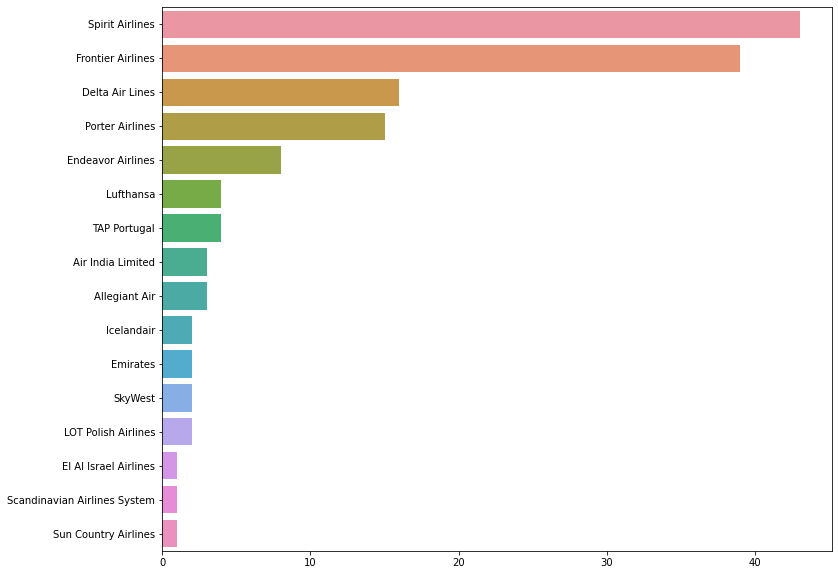

In [79]:
#Number of flight delay by Airline
Airlines = flightmerge['Operating_Airline_Desc'].value_counts()
plt.figure(figsize=(12,10))
sns.barplot( x=Airlines.values , y=list(Airlines.index), 
 orient="h"  ) ;

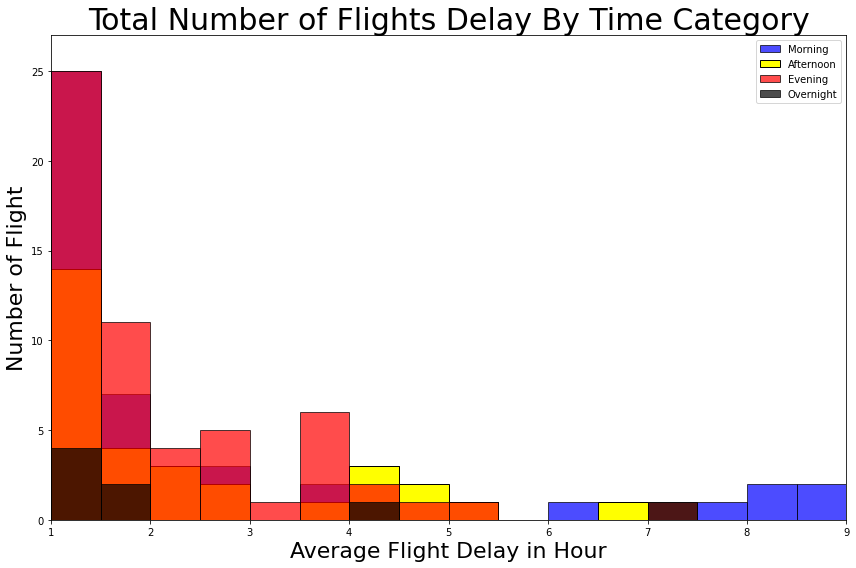

In [87]:
bin = np.divide(list(range(50)),2)

#What time flight are getting delay
plt.rcParams['figure.figsize'] = [12,8]
ax = plt.subplot()
ax.hist(flightmerge[flightmerge['Time Category'] == 'Morning']['Hour_Delay'], color = 'blue', alpha = 0.7,edgecolor = 'black',bins = bin, label = 'Morning')
ax.hist(flightmerge[flightmerge['Time Category'] == 'Afternoon']['Hour_Delay'], color = 'yellow', alpha = 1,edgecolor = 'black',bins = bin, label = 'Afternoon')
ax.hist(flightmerge[flightmerge['Time Category'] == 'Evening']['Hour_Delay'], color = 'red', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Evening')
ax.hist(flightmerge[flightmerge['Time Category'] == 'Overnight']['Hour_Delay'], color = 'black', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Overnight')
# Title and labels
ax.set_title('Total Number of Flights Delay By Time Category', size = 30)
ax.set_xlabel('Average Flight Delay in Hour', size = 22)
ax.set_ylabel('Number of Flight', size= 22)
plt.legend(loc='upper right')
plt.xlim(1,9)
plt.ylim(0,27)
plt.tight_layout()
plt.show()

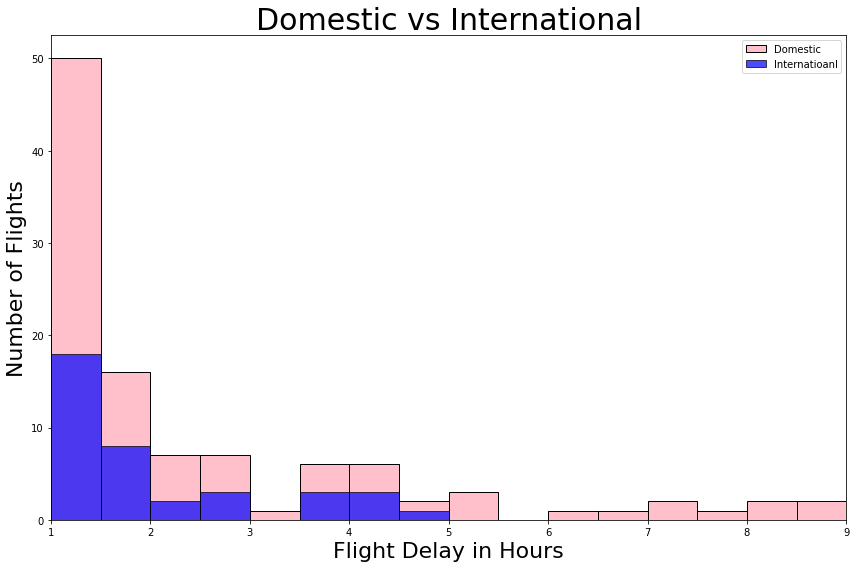

In [90]:
#Domestic vs International
plt.rcParams['figure.figsize'] = [12,8]
ax = plt.subplot()
ax.hist(flightmerge[flightmerge['International_Domestic'] == 'Domestic']['Hour_Delay'], color = 'pink', edgecolor = 'black',bins = bin,label = 'Domestic')
ax.hist(flightmerge[flightmerge['International_Domestic'] == 'International']['Hour_Delay'], color = 'blue', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Internatioanl')
# Title and labels
ax.set_title('Domestic vs International', size = 30)
ax.set_xlabel('Flight Delay in Hours', size = 22)
ax.set_ylabel('Number of Flights', size= 22)
plt.legend(loc='upper right')
plt.xlim(1,9)
#plt.ylim(0,30)
plt.tight_layout()
plt.show()

# International Flight Delay Analysis

In [91]:
International = flightmerge[flightmerge.International_Domestic=='International']

In [92]:
International.head(3)

,Date,Flight_Schedule,Flight_Departure,International_Domestic,Non-PA_Airport_Country_Desc,Operating_Airline_Desc,Gate_Desc,Hour_Delay,Time Category
12,9/1/2021,2021-09-01 18:05:00,2021-09-01 19:11:53,International,Germany,Lufthansa,B62,1.114722,Evening
13,9/1/2021,2021-09-01 20:35:00,2021-09-01 23:12:26,International,Malta,Lufthansa,B63,2.623889,Evening
17,9/1/2021,2021-09-01 21:00:00,2021-09-01 23:49:11,International,Israel,El Al Israel Airlines,B68,2.819722,Evening


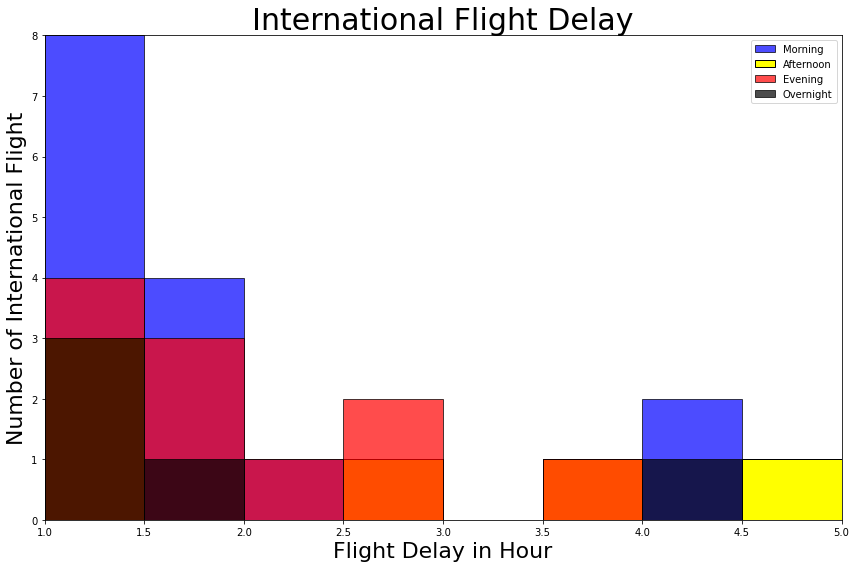

In [110]:
#What time flight are getting delay for International Flight
plt.rcParams['figure.figsize'] = [12,8]
ax = plt.subplot()
ax.hist(International[International['Time Category'] == 'Morning']['Hour_Delay'], color = 'blue', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Morning')
ax.hist(International[International['Time Category'] == 'Afternoon']['Hour_Delay'], color = 'yellow', alpha = 1,edgecolor = 'black',bins = bin,label = 'Afternoon')
ax.hist(International[International['Time Category'] == 'Evening']['Hour_Delay'], color = 'red', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Evening')
ax.hist(International[International['Time Category'] == 'Overnight']['Hour_Delay'], color = 'black', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Overnight')
# Title and labels
ax.set_title('International Flight Delay', size = 30)
ax.set_xlabel('Flight Delay in Hour', size = 22)
ax.set_ylabel('Number of International Flight', size= 22)
plt.legend(loc='upper right')
plt.xlim(1,5)
plt.ylim(0,8)
plt.tight_layout()
plt.show()

# Domestic Flight Delay Analysis

In [100]:
Domestic = flightmerge[flightmerge.International_Domestic=='Domestic']

In [101]:
Domestic.head(3)

,Date,Flight_Schedule,Flight_Departure,International_Domestic,Non-PA_Airport_Country_Desc,Operating_Airline_Desc,Gate_Desc,Hour_Delay,Time Category
6,9/1/2021,2021-09-01 08:35:00,2021-09-01 09:38:22,Domestic,USA,Delta Air Lines,B45,1.056111,Morning
24,9/1/2021,2021-09-01 18:19:00,2021-09-01 19:20:54,Domestic,USA,Frontier Airlines,B44,1.031667,Evening
33,9/1/2021,2021-09-01 08:27:00,2021-09-01 11:22:35,Domestic,USA,Spirit Airlines,B41A,2.926389,Morning


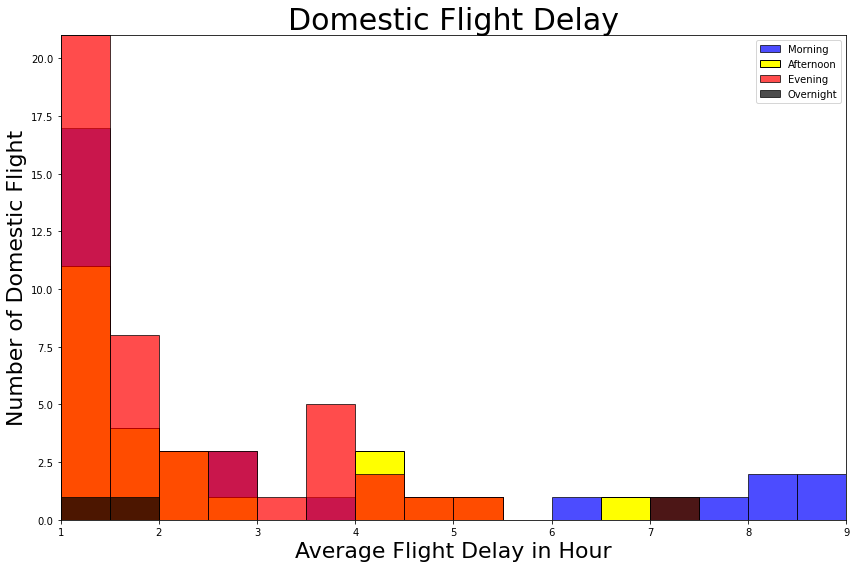

In [107]:
#What time flight are getting delay for Domestice Flight
plt.rcParams['figure.figsize'] = [12,8]
ax = plt.subplot()
ax.hist(Domestic[Domestic['Time Category'] == 'Morning']['Hour_Delay'], color = 'blue', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Morning')
ax.hist(Domestic[Domestic['Time Category'] == 'Afternoon']['Hour_Delay'], color = 'yellow', alpha = 1,edgecolor = 'black',bins = bin,label = 'Afternoon')
ax.hist(Domestic[Domestic['Time Category'] == 'Evening']['Hour_Delay'], color = 'red', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Evening')
ax.hist(Domestic[Domestic['Time Category'] == 'Overnight']['Hour_Delay'], color = 'black', alpha = 0.7,edgecolor = 'black',bins = bin,label = 'Overnight')
# Title and labels
ax.set_title('Domestic Flight Delay', size = 30)
ax.set_xlabel('Average Flight Delay in Hour', size = 22)
ax.set_ylabel('Number of Domestic Flight', size= 22)
plt.legend(loc='upper right')
plt.xlim(1,9)
plt.ylim(0,21)
plt.tight_layout()
plt.show()

# Finding maximum flight delay for both international and Domestic flights

In [111]:
flightmerge = flightmerge.rename(columns={"International_Domestic": "Destination", "Operating_Airline_Desc": "Airline","Time Category":"Time Of Day" })

In [112]:
col1 = 'Airline'
col2 = 'Destination'
col3 = 'Time Of Day'

In [113]:
#statistical values
df_stat = flightmerge.groupby([col1, col2, col3]).agg({'Hour_Delay':'count'})

In [114]:
df_max = flightmerge.groupby([col1,col2,col3])['Hour_Delay'].max()

In [115]:
df_stat['Max Hour Delay'] = df_max.values

In [116]:
df_median = flightmerge.groupby([col1,col2,col3])['Hour_Delay'].median()

In [117]:
df_stat['Median Delay'] = df_median.values

In [118]:
df_std = flightmerge.groupby([col1,col2,col3])['Hour_Delay'].std()

In [119]:
df_stat['Standard Deviation'] = df_std.values

In [120]:
df_stat.columns

Index(['Hour_Delay', 'Max Hour Delay', 'Median Delay', 'Standard Deviation'], dtype='object')

In [121]:
df_stat = df_stat.rename(columns={"Hour_Delay": "Total Hour Delay", })

In [122]:
df_stat.sort_values(by=['Total Hour Delay'],ascending=False).head(10)

Total Hour Delay  Max Hour Delay  \
Airline           Destination   Time Of Day                                     
Spirit Airlines   Domestic      Evening                    19        4.412778   
Frontier Airlines Domestic      Evening                    18       17.408889   
Spirit Airlines   Domestic      Afternoon                  11        4.668333   
                                Morning                    10        4.041389   
Porter Airlines   International Morning                     9        4.201667   
Frontier Airlines Domestic      Morning                     9        6.083611   
Delta Air Lines   Domestic      Morning                     8        8.786944   
Frontier Airlines Domestic      Afternoon                   8        6.660000   
Delta Air Lines   Domestic      Evening                     6        7.250000   
Lufthansa         International Evening                     4        2.623889   

                                             Median Delay  Standard Deviation  
Airline           Destination   Time Of Day                                    
Spirit Airlines   Domestic      Evening          1.636944            1.081459  
Frontier Airlines Domestic      Evening          1.490694            3.843204  
Spirit Airlines   Domestic      Afternoon        1.425000            1.275387  
                                Morning          1.463056            1.068507  
Porter Airlines   International Morning          1.226667            1.008280  
Frontier Airlines Domestic      Morning          1.250556            1.755623  
Delta Air Lines   Domestic      Morning          8.048056            3.204184  
Frontier Airlines Domestic      Afternoon        1.446250            2.040919  
Delta Air Lines   Domestic      Evening          1.389722            2.498827  
Lufthansa         International Evening          1.690833            0.666291

In [123]:
#change the aggregated table to a dataframe and saved as a csv file to retrieve airlines names
df_stat = pd.DataFrame(df_stat)

In [125]:
df_stat.to_csv('Flight_Schedule_Analysis.csv')

In [126]:
df=pd.read_csv('Flight_Schedule_Analysis.csv')

In [132]:
#Top 10 airlines with total hour delay 
df.sort_values(by=['Total Hour Delay'],ascending=False).head(10).reset_index(drop=True)

,Airline,Destination,Time Of Day,Total Hour Delay,Max Hour Delay,Median Delay,Standard Deviation
0,Spirit Airlines,Domestic,Evening,19,4.412778,1.636944,1.081459
1,Frontier Airlines,Domestic,Evening,18,17.408889,1.490694,3.843204
2,Spirit Airlines,Domestic,Afternoon,11,4.668333,1.425000,1.275387
3,Spirit Airlines,Domestic,Morning,10,4.041389,1.463056,1.068507
4,Porter Airlines,International,Morning,9,4.201667,1.226667,1.008280
5,Frontier Airlines,Domestic,Morning,9,6.083611,1.250556,1.755623
6,Delta Air Lines,Domestic,Morning,8,8.786944,8.048056,3.204184
7,Frontier Airlines,Domestic,Afternoon,8,6.660000,1.446250,2.040919
8,Delta Air Lines,Domestic,Evening,6,7.250000,1.389722,2.498827
9,Lufthansa,International,Evening,4,2.623889,1.690833,0.666291
